![chihuahua-or-muffin[1].jpg](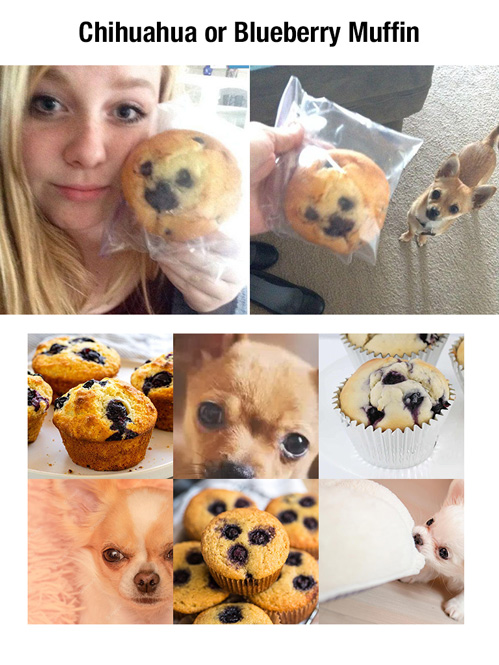)

In [1]:
# Note: After you run this cell, the training and test data will be available in
# the file browser. (Click the folder icon on the left to view it)
#
# If you don't see the data after the cell completes, click the refresh button
# in the file browser (folder icon with circular arrow)

# First, let's download and unzip the data
!echo "Downloading files..."
!wget -q https://github.com/byui-cse/cse450-course/raw/master/data/muffin/training.zip
!wget -q https://github.com/byui-cse/cse450-course/raw/master/data/muffin/test.zip
!wget -q https://github.com/byui-cse/cse450-course/raw/master/data/muffin/test_classes.csv

!echo "Unzipping files..."
!unzip -q /content/training.zip
!unzip -q /content/test.zip

# Cleanup
!echo "Cleaning up..."
!rm training.zip
!rm test.zip

!echo "Data ready."

Unzipping files...
Cleaning up...
Data ready.


In [2]:
# Import libraries
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import random

In [104]:
# We're using keras' ImageDataGenerator class to load our image data.
# See (https://keras.io/api/preprocessing/image/#imagedatagenerator-class) for details
# https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
#
# A couple of things to note:
# 1. We're specifying a number for the seed, so we'll always get the same shuffle and split of our images.
# 2. Class names are inferred automatically from the image subdirectory names.
# 3. We're splitting the training data into 80% training, 20% validation.

import random
training_dir = '/content/training/'
image_size = (224, 224)

# Split up the training data images into training and validations sets
# We'll use and ImageDataGenerator to do the splits
# ImageDataGenerator can also be used to do preprocessing and agumentation on the files as can be seen with rescale

train_datagen = ImageDataGenerator(
        rescale=1./255,
        validation_split=.2,
        # try other augmentations here
        horizontal_flip=True
        )
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        validation_split=.2
        )

train_generator = train_datagen.flow_from_directory(
        training_dir,
        target_size = image_size,
        subset="training",
        batch_size=6,
        class_mode='sparse',
        # seed=42,
        shuffle=True)
validation_generator = validation_datagen.flow_from_directory(
        training_dir,
        target_size=image_size,
        batch_size=6,
        class_mode='sparse',
        subset="validation",
        # seed=42
        )

Found 720 images belonging to 2 classes.
Found 179 images belonging to 2 classes.


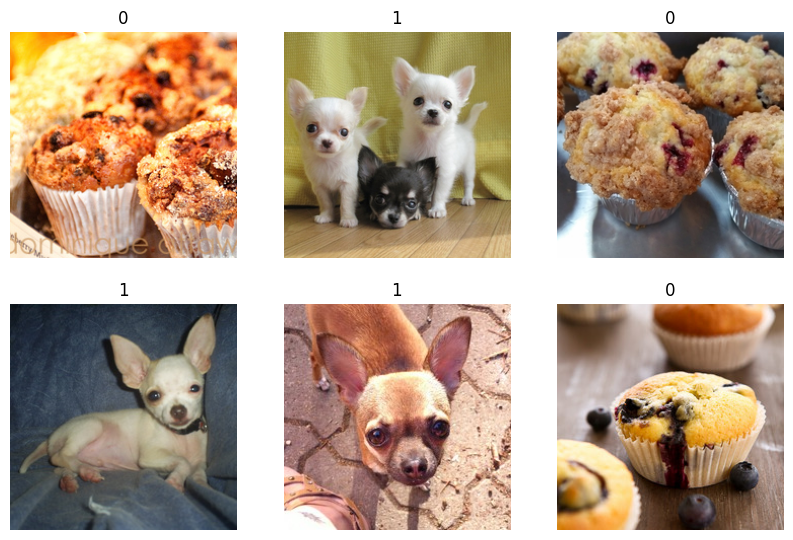

In [105]:
# View 9 images and their class labels
plt.figure(figsize=(10, 10))
images, labels = next(train_generator)  # Assuming train_generator is a generator
batch_size = images.shape[0]

for i in range(min(9, batch_size)):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow((images[i] * 255).astype("uint8"))
    plt.title(int(labels[i]))
    plt.axis("off")

plt.show()

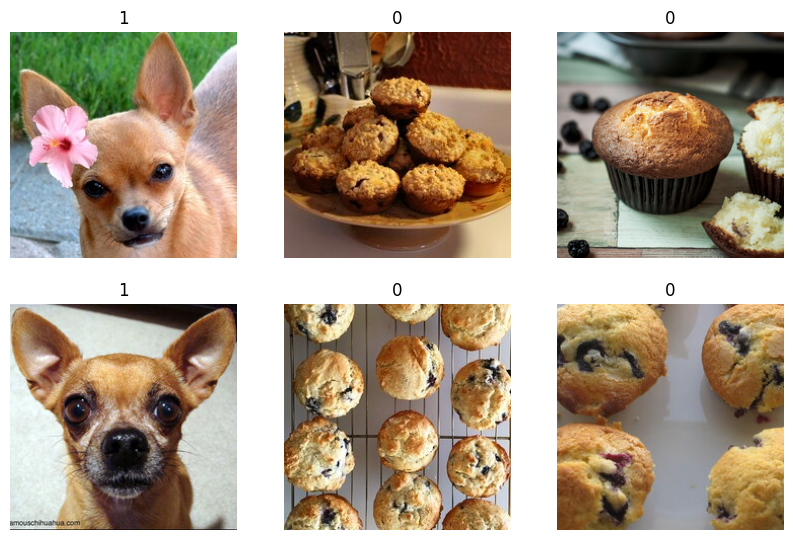

In [106]:
# View 9 images and their class labels
plt.figure(figsize=(10, 10))
for images, labels in validation_generator:
    for i in range(6):
        first_image = images.tolist()[i]
        ax = plt.subplot(3, 3, i + 1)
        f = np.array(first_image)*255
        plt.imshow(f.astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")
    break


In [107]:
# Build a model...
import numpy as np
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [108]:
from tensorflow.keras.preprocessing import image_dataset_from_directory


In [109]:


model = models.Sequential()
model.add(layers.Conv2D(2, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(4, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
# modify the hidden layers
# model.add(layers.Conv2D(4, (5,5), strides=2,padding='same', activation='leaky_relu'))
# model.add(layers.MaxPooling2D((3, 3)))
# model.add(layers.BatchNormalization())
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dropout(.25))

model.add(layers.Dense(2))
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 222, 222, 2)       56        
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 111, 111, 2)       0         
 ng2D)                                                           
                                                                 
 conv2d_37 (Conv2D)          (None, 109, 109, 4)       76        
                                                                 
 max_pooling2d_26 (MaxPooli  (None, 54, 54, 4)         0         
 ng2D)                                                           
                                                                 
 flatten_10 (Flatten)        (None, 11664)             0         
                                                                 
 dense_20 (Dense)            (None, 64)              

In [110]:
# opt = keras.optimizers.Adam(learning_rate=0.01)
opt = keras.optimizers.Adam()
model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [112]:
checkpoint_filepath = '/tmp/checkpoint6'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
model.fit(
        train_generator,
        steps_per_epoch=120,
        epochs=30,
        validation_data=validation_generator,
        callbacks=[model_checkpoint_callback],
        initial_epoch=0)

model.load_weights(checkpoint_filepath)

Epoch 1/30
 56/120 [=============>................] - ETA: 0s - loss: 0.6641 - accuracy: 0.6131

/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:858: UserWarning: Truncated File Read
  warnings.warn(str(msg))


120/120 [==============================] - 4s 19ms/step - loss: 0.6487 - accuracy: 0.6514 - val_loss: 0.5362 - val_accuracy: 0.7654
Epoch 2/30
120/120 [==============================] - 2s 17ms/step - loss: 0.4612 - accuracy: 0.8000 - val_loss: 0.4333 - val_accuracy: 0.8045
Epoch 3/30
120/120 [==============================] - 2s 16ms/step - loss: 0.3694 - accuracy: 0.8542 - val_loss: 0.4185 - val_accuracy: 0.7989
Epoch 4/30
120/120 [==============================] - 3s 24ms/step - loss: 0.2955 - accuracy: 0.8861 - val_loss: 0.4069 - val_accuracy: 0.8268
Epoch 5/30
120/120 [==============================] - 2s 19ms/step - loss: 0.2313 - accuracy: 0.9056 - val_loss: 0.3937 - val_accuracy: 0.8101
Epoch 6/30
120/120 [==============================] - 2s 19ms/step - loss: 0.1656 - accuracy: 0.9292 - val_loss: 0.3968 - val_accuracy: 0.8045
Epoch 7/30
120/120 [==============================] - 2s 16ms/step - loss: 0.1147 - accuracy: 0.9694 - val_loss: 0.5344 - val_accuracy: 0.7989
Epoch 8/30

In [113]:
model.load_weights(checkpoint_filepath)

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36_input (InputLaye  [(None, 224, 224, 3)]     0         
 r)                                                              
                                                                 
 conv2d_36 (Conv2D)          (None, 222, 222, 2)       56        
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 111, 111, 2)       0         
 ng2D)                                                           
                                                                 
Total params: 56 (224.00 Byte)
Trainable params: 56 (224.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
1/1 [==============================] - 0s 96ms/step


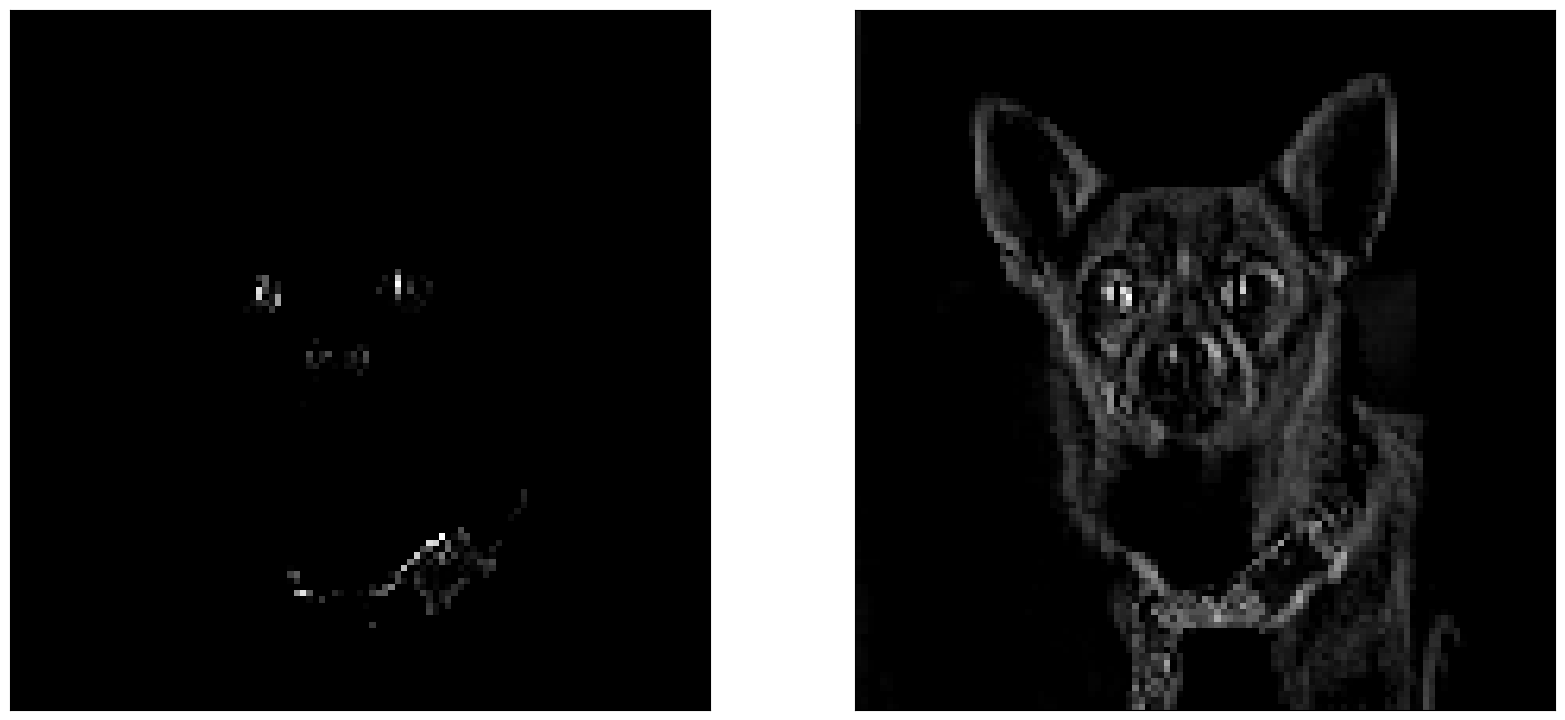

In [116]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import Model
from PIL import Image, ImageEnhance
from matplotlib import pyplot
from numpy import expand_dims
import math
from PIL import Image, ImageStat
# load the model
# redefine model to output right after the first hidden layer
model_temp = Model(inputs=model.inputs, outputs=model.layers[1].output) #0 #3 #5 #8
model_temp.summary()
# load the image with the required shape
img = load_img('test/0079.jpg', target_size=(224, 224))
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
# img = preprocess_input(img)
# get feature map for first hidden layer
feature_maps = model_temp.predict(img)
# plot all 64 maps in an 8x8 squares
square = 2
ix = 1
plt.figure(figsize=(20, 20))

for _ in range(square):
  # specify subplot and turn of axis
  ax = pyplot.subplot(square, square, ix)
  ax.set_xticks([])
  ax.set_yticks([])
  # plot filter channel in grayscale
  pyplot.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
  ix += 1
# show the figure
pyplot.show()

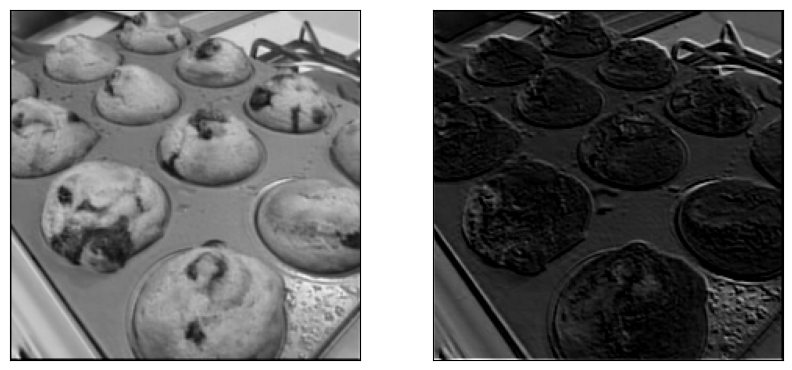

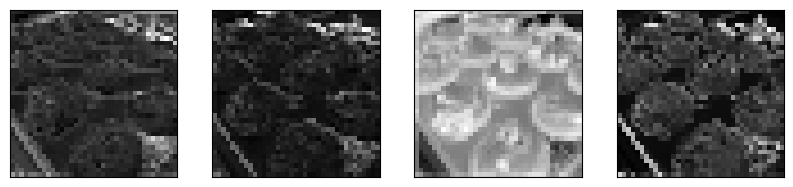

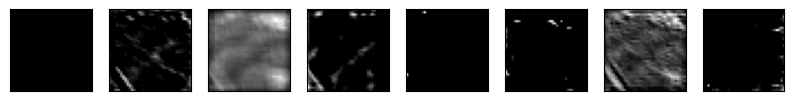

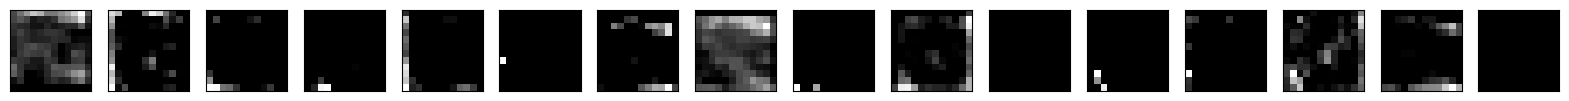

In [117]:
# import os
# checkpoint_dir = os.path.dirname(checkpoint_filepath)

# os.listdir(checkpoint_dir)


In [118]:
# latest = tf.train.latest_checkpoint(checkpoint_dir)
# latest

In [119]:
# Loads the weights
# model.load_weights(latest)

# Re-evaluate the model
# loss, acc = model.evaluate(test_images, test_labels, verbose=2)
# print("Restored model, accuracy: {:5.2f}%".format(100 * acc))


In [120]:
datagen = ImageDataGenerator()
test_data = datagen.flow_from_directory('.', classes=['test'])

Found 100 images belonging to 1 classes.


In [121]:
from tensorflow.keras.preprocessing import image_dataset_from_directory
test_dir = '/content/'
image_size = (224, 224)

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        test_dir,
        classes=['test'],
        target_size=image_size,
        class_mode='sparse',
        shuffle=False)
# print(test_generator.next())
predictions = model.predict(test_generator, use_multiprocessing=True)
y_pred = [np.argmax(probas) for probas in predictions]

Found 100 images belonging to 1 classes.
4/4 [==============================] - 3s 375ms/step


In [122]:
print(y_pred)

[0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1]


In [123]:
output = pd.DataFrame(y_pred)

In [124]:
output.to_csv("muffin-predictions.csv",index=False)

In [125]:
real_answers = pd.read_csv("test_classes.csv")
real_answers.head(100)

,filename,ClassId
0,0000.jpg,0
1,0001.jpg,1
2,0002.jpg,1
3,0003.jpg,0
4,0004.jpg,1
...,...,...
95,0095.jpg,0
96,0096.jpg,1
97,0097.jpg,1
98,0098.jpg,0


In [126]:
from sklearn.metrics import classification_report
print(classification_report(real_answers['ClassId'],y_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88        50
           1       0.91      0.82      0.86        50

    accuracy                           0.87       100
   macro avg       0.87      0.87      0.87       100
weighted avg       0.87      0.87      0.87       100



In [127]:
overall = pd.concat([pd.DataFrame(y_pred,columns=['class']),real_answers['ClassId'].reset_index(drop=True)],axis=1)
# overall.head()
print(1-len(overall[overall['class']!=overall['ClassId']])/len(overall))
print(overall[overall['class']!=overall['ClassId']])
print("Missed: ",len(overall[overall['class']!=overall['ClassId']]))

0.87
    class  ClassId
1       0        1
4       0        1
22      0        1
26      1        0
28      1        0
31      0        1
36      1        0
48      0        1
61      1        0
67      0        1
73      0        1
89      0        1
92      0        1
Missed:  13


In [128]:
print(overall.head(15))

    class  ClassId
0       0        0
1       0        1
2       1        1
3       0        0
4       0        1
5       0        0
6       1        1
7       0        0
8       1        1
9       0        0
10      1        1
11      0        0
12      1        1
13      1        1
14      1        1
